In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Datenauswertung Gehälter

**Wir haben diese Datensätze:**

1. Tabelle mit konkreten Bezügen für Personen, die unterteilt sind in Grundgehalt und erfolgsabhängige Bezüge. Größtenteils für NRW. Dazu ausgewählte Sparkassen in Hessen und für andere Bundesländer
2. Kerntabelle ist ein andere: Diese beinhaltet Gesamtbezüge und Anzahl Vorstände und daraus errechnetes durchschnittl. Gehalt für 2013 und 2014 (selber gesammelte Werte). Als Relationsgrößen setzen wir die Größe der Sparkasse, die wir durch die Werte Bilanzsumme, Vergebene Kredite und Anzahl Mitarbeiter errechnen, alles Werte aus dem Crowdnewsromm)

## Vorstände Einzeldaten

In [6]:
df_single = pd.read_csv('./data/vorstaende_single.csv')

### Wie hoch ist der Anteil erfolgsabhängiger Gehälter am Gesamtgehalt? Gibt es Anteile, die auffällig hoch sind?

In [7]:
df_single['erfolgsabhaengige_quote'] = df_single.erfolgsabhaengige_bezuege / df_single.gesamtverguetung

In [9]:
df_single.erfolgsabhaengige_quote.max()

1.0

In [10]:
# strip out some data errors:
df_single_fixed = df_single[df_single.erfolgsabhaengige_quote < 1]

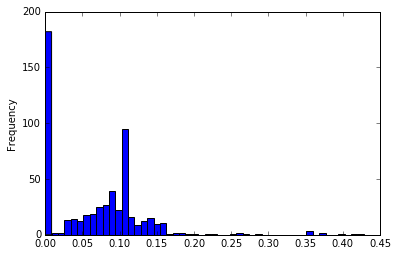

In [21]:
df_single_fixed.erfolgsabhaengige_quote.plot.hist(bins=50)

#### Wie viele Vorstände haben eine Quote > 15% (Verbandsempfehlung?)

In [33]:
len(df_single_fixed[df_single_fixed.erfolgsabhaengige_quote > 0.15].index)

38

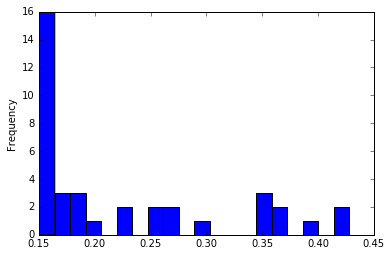

In [24]:
df_single_fixed[df_single_fixed.erfolgsabhaengige_quote > 0.15].erfolgsabhaengige_quote.plot.hist(bins=20)

### Wie viele Gehälter haben wir, die nicht NRW sind? 

Hat zum Beispiel in Hessen fast jeder Sparkassen die Gehälter veröffentlicht und es hat bislang noch kein Medium erkannt, weil sie es nicht offiziell gemacht haben? Hintergrund: Der Pressesprecher vom hessischen Verband meinte zu mir, dass mittlerweile seine Sparkassen die konkreten Bezüge veröffentlichen, weil jeder durch die Gesamtbezüge den Durchschnitt ausrechnen könnte und dann würden sie lieber das richtige konkrete Gehalt veröffentliht sehen.

In [35]:
# TODO: merge with states data

## Vorstände Gesamtdaten

In [44]:
df_gesamt = pd.read_csv('./data/merged_all.csv')
df_gesamt['bezuege_pro_vorstand_2014'] = df_gesamt.gesamtbezuege_2014 / df_gesamt.anzahl_vorstaende_2014

### Von wie vielen Sparkassen haben wir diese Gehaltswerte erfasst?

In [38]:
len(df_gesamt.index)

417

### Wie viel verdient ein Vorstand durchschnittlich?

#### 2014

In [39]:
df_gesamt.gesamtbezuege_2014.mean()

859430.86986301374

#### 2013

In [40]:
df_gesamt.gesamtbezuege_2013.mean()

845776.9815625

#### Veränderung 2013 - 2014

In [41]:
df_gesamt.gesamtbezuege_2014.mean() - df_gesamt.gesamtbezuege_2013.mean()

13653.888300513732

### Top 10: Diese Sparkassen Vorstände verdienen das meiste Geld


In [47]:
df_gesamt.sort_values('bezuege_pro_vorstand_2014', ascending=False)[
    ['sparkasse', 'gesamtbezuege_2014', 'bezuege_pro_vorstand_2014', 'anzahl_vorstaende_2014']][:10]

,sparkasse,gesamtbezuege_2014,bezuege_pro_vorstand_2014,anzahl_vorstaende_2014
415,Hamburger Sparkasse AG,4200000.0,840000.000000,5.0
387,Stadtsparkasse Wuppertal,1557000.0,778500.000000,2.0
413,Kreissparkasse Köln,3521400.0,704280.000000,5.0
416,Berliner Sparkasse,3911000.0,651833.333333,6.0
410,Sparkasse Hannover,2246000.0,623888.888889,3.6
412,Frankfurter Sparkasse,2452000.0,613000.000000,4.0
407,Die Sparkasse Bremen AG,2400000.0,600000.000000,4.0
398,Sparkasse Münsterland Ost,2224000.0,556000.000000,4.0
402,Sparkasse Aachen,2724000.0,544800.000000,5.0
399,Stadt- und Kreissparkasse Leipzig,1627000.0,542333.333333,3.0
